<a href="https://colab.research.google.com/github/ronnieogwang/Deep_learning_for_CV/blob/master/code/chapter_20/inception_optimized_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#inception model

In [0]:
import tensorflow as tf
from tensorflow import keras 

In [0]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout
from tensorflow.keras.optimizers import Adam, SGD
#from tensorflow.keras.layers.merge import concatenate
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

In [18]:
#load dataset
(X_train, y_train),(X_test,(y_test)) = cifar10.load_data()
#summarize data
print("train X= %s and y=%s" % (X_train.shape, y_train.shape))
print("test X= %s and y=%s" % (X_test.shape, y_test.shape))


train X= (50000, 32, 32, 3) and y=(50000, 1)
test X= (10000, 32, 32, 3) and y=(10000, 1)


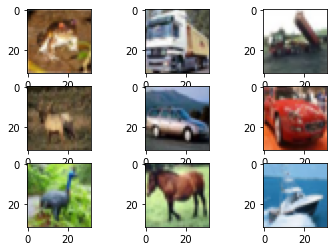

In [19]:
#plot images
for i in range(9):
  pyplot.subplot(331+i)
  pyplot.imshow(X_train[i])
pyplot.show()


In [0]:
#preprocess images
#Normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255.0
X_test = X_test/255.0

#categorical data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [21]:
y_train.shape

(50000, 10)

In [0]:
#define model
visible = Input(shape =(32,32,3))
#1x1 conv
conv1 = Conv2D(64, (1,1), padding = 'same', activation = 'relu')(visible)
drop1 = Dropout(0.4)(conv1)
#3x3 conv
conv3 = Conv2D(96, (1,1), padding = 'same', activation = 'relu')(visible)
conv3 = Conv2D(128, (3,3), padding = 'same', activation = 'relu')(conv3)
drop3 = Dropout(0.4)(conv3)
#5x5
conv5 = Conv2D(16, (1,1), padding = 'same', activation = 'relu')(visible)
conv5 = Conv2D(32, (5,5), padding = 'same', activation = 'relu')(conv5)
drop5 = Dropout(0.4)(conv5)
#pool
pool = MaxPooling2D((2,2),strides= (1,1), padding='same')(visible)
pool = Conv2D(32, (1,1), padding = 'same', activation = 'relu')(pool)
drop_pool = Dropout(0.4)(pool)

layer_out = tf.keras.layers.concatenate([drop1,drop3,drop5,drop_pool],axis=-1)
flat1= Flatten()(layer_out)
dense1 = Dense(128, activation= 'relu', kernel_initializer='he_uniform')(flat1)
drop_dense = Dropout(0.4)(dense1)
dense2 = Dense(10, activation='softmax')(drop_dense)
model = Model(inputs= visible, outputs=dense2)
opt = SGD(lr=0.01, momentum = 0.9)
model.compile(optimizer = opt, loss= 'categorical_crossentropy', metrics = ['accuracy'])



In [24]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 32, 32, 96)   384         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 32, 32, 16)   64          input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 32, 32, 3)    0           input_4[0][0]                    
____________________________________________________________________________________________

In [25]:
history = model.fit(X_train, y_train, batch_size=32, epochs =15,validation_data = (X_test, y_test), verbose= 1 )

Epoch 1/15
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8656 - accuracy: 0.3042 - val_loss: 1.4605 - val_accuracy: 0.4642
Epoch 2/15
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5418 - accuracy: 0.4396 - val_loss: 1.3386 - val_accuracy: 0.5271
Epoch 3/15
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3540 - accuracy: 0.5147 - val_loss: 1.2175 - val_accuracy: 0.5672
Epoch 4/15
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1929 - accuracy: 0.5741 - val_loss: 1.1256 - val_accuracy: 0.5990
Epoch 5/15
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0582 - accuracy: 0.6238 - val_loss: 1.0772 - val_accuracy: 0.6217
Epoch 6/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9371 - accuracy: 0.6673 - val_loss: 1.0719 - val_accuracy: 0.6259
Epoch 7/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8263 - accuracy: 0.7074 - val_loss: 1.0848 -

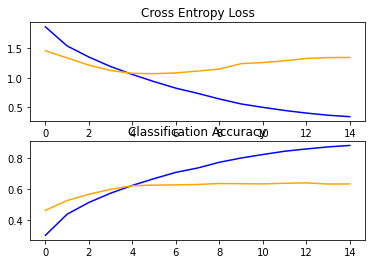

In [26]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

In [0]:
_,acc = model.evaluate(X_test,y_test, verbose = 0)

In [28]:
print('accuracy is: %.3f'%(acc*100.0))

accuracy is: 63.320
